## Demo

Note: 
The end user needs to install pygraphviz which has dependencies. view <https://pygraphviz.github.io/documentation/stable/install.html>

## For mac
pip install --config-settings="--global-option=build_ext" \
            --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" \
            --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" \
            pygraphviz

In [1]:
from pipesyntax import PipeSyntax, QueryExecutionPlan

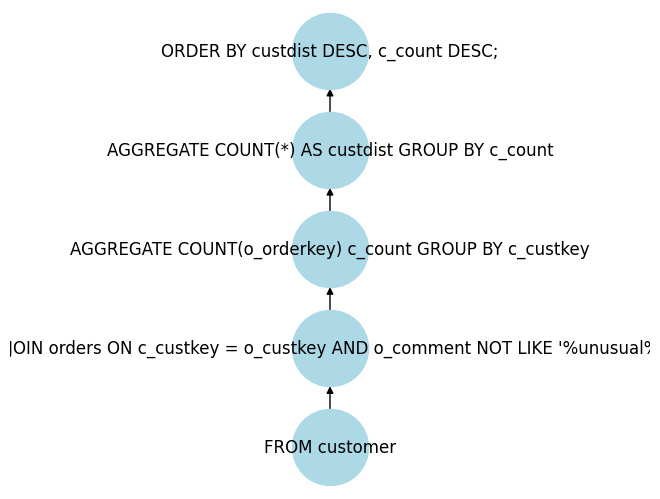

In [2]:
pipe_syntax = """
FROM customer  
|> LEFT OUTER JOIN orders ON c_custkey = o_custkey AND o_comment NOT LIKE '%unusual%packages%'  
|> AGGREGATE COUNT(o_orderkey) c_count GROUP BY c_custkey  
|> AGGREGATE COUNT(*) AS custdist GROUP BY c_count  
|> ORDER BY custdist DESC, c_count DESC;
"""

query_plan = QueryExecutionPlan("Sample Query")
query_plan.generate(pipe_syntax)
query_plan.visualize()